# Hackaton : Fraud Bancaire

## Data Exploration (EDA)

## Introduction

Dans cette partie, on explore les trois fichiers de données pour :

- comprendre la structure et les types de variables

- détecter les valeurs manquantes et les anomalies

- observer la répartition des fraudes

- identifier les variables les plus pertinentes pour la suite

---







# 1. EDA : Transactions

### **transactions_train.csv**



**Description du fichier**


Ce fichier contient l’historique des transactions bancaires effectuées par les clients.

Chaque ligne correspond à une transaction unique liée à un client et à une carte.

On y retrouve le montant, la méthode d’utilisation de la carte, le commerçant et le code MCC (Merchant Category Code).

| Colonne            | Description                                         |
| ------------------ | --------------------------------------------------- |
| **transaction_id** | Identifiant unique de la transaction                |
| **date**           | Date et heure de la transaction                     |
| **client_id**      | Identifiant du client ayant effectué la transaction |
| **card_id**        | Identifiant de la carte utilisée                    |
| **amount**         | Montant de la transaction (format `$12.35`)         |
| **use_chip**       | Type de transaction : par puce, bande, etc.         |
| **merchant_id**    | Identifiant du commerçant                           |
| **merchant_city**  | Ville du commerçant                                 |
| **merchant_state** | État du commerçant                                  |
| **zip**            | Code postal du commerçant                           |
| **mcc**            | Code MCC (type de commerce)                         |
| **errors**         | Codes ou erreurs liés à la transaction              |


**Chargement et aperçu**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# charger le fichier
transactions = pd.read_csv("transactions_train.csv")

# aperçu général
transactions.info()
transactions.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  210000 non-null  int64  
 1   date            210000 non-null  object 
 2   client_id       210000 non-null  int64  
 3   card_id         210000 non-null  int64  
 4   amount          210000 non-null  object 
 5   use_chip        210000 non-null  object 
 6   merchant_id     210000 non-null  int64  
 7   merchant_city   210000 non-null  object 
 8   merchant_state  184569 non-null  object 
 9   zip             183203 non-null  float64
 10  mcc             210000 non-null  int64  
 11  errors          3273 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 19.2+ MB


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,5942,NaN
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,5814,NaN
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,5411,NaN
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,5411,NaN
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,4214,NaN


**Nettoyage des données**

In [3]:
# supprimer le symbole $ et convertir le montant en float
transactions["amount"] = transactions["amount"].replace('[\$,]', '', regex=True).astype(float)

# convertir la date en format datetime
transactions["date"] = pd.to_datetime(transactions["date"], errors="coerce")

# vérifier les valeurs manquantes et les doublons
print(transactions.isna().sum())
print("doublons :", transactions.duplicated().sum())


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1201878324.py:2: SyntaxWarning: invalid escape sequence '\$'
  transactions["amount"] = transactions["amount"].replace('[\$,]', '', regex=True).astype(float)


transaction_id         0
date                   0
client_id              0
card_id                0
amount                 0
use_chip               0
merchant_id            0
merchant_city          0
merchant_state     25431
zip                26797
mcc                    0
errors            206727
dtype: int64
doublons : 0


**Statistiques descriptives**

In [ ]:
transactions.describe(include='all')

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
count,2.100000e+05,210000,210000.000000,210000.000000,210000.000000,210000,210000.000000,210000,184569,183203.000000,210000.000000,3273
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,5472,122,NaN,NaN,16
top,NaN,NaN,NaN,NaN,NaN,Chip Transaction,NaN,ONLINE,CA,NaN,NaN,Insufficient Balance
freq,NaN,NaN,NaN,NaN,NaN,150302,NaN,25431,20694,NaN,NaN,2005
mean,1.974756e+07,2017-07-03 01:52:08.139428608,1026.688005,3525.187081,42.552883,NaN,48042.276714,NaN,NaN,50373.614280,5571.994757,NaN
min,1.717259e+07,2016-01-01 00:29:00,0.000000,0.000000,-500.000000,NaN,22.000000,NaN,NaN,1028.000000,1711.000000,NaN
25%,1.846539e+07,2016-10-04 09:03:15,556.000000,2443.000000,8.730000,NaN,25887.000000,NaN,NaN,28215.000000,5300.000000,NaN
50%,1.974602e+07,2017-07-03 08:58:00,1073.000000,3675.000000,28.170000,NaN,46284.000000,NaN,NaN,46260.000000,5499.000000,NaN
75%,2.103520e+07,2018-04-02 11:26:15,1520.000000,4949.000000,62.260000,NaN,68751.000000,NaN,NaN,77086.000000,5813.000000,NaN
max,2.232644e+07,2018-12-31 23:31:00,1997.000000,6138.000000,2775.670000,NaN,100340.000000,NaN,NaN,99928.000000,9402.000000,NaN


**Analyse du montant des transactions**

montant minimum : -500.0
montant maximum : 2775.67
montant moyen : 42.552883047619034
médiane du montant : 28.17


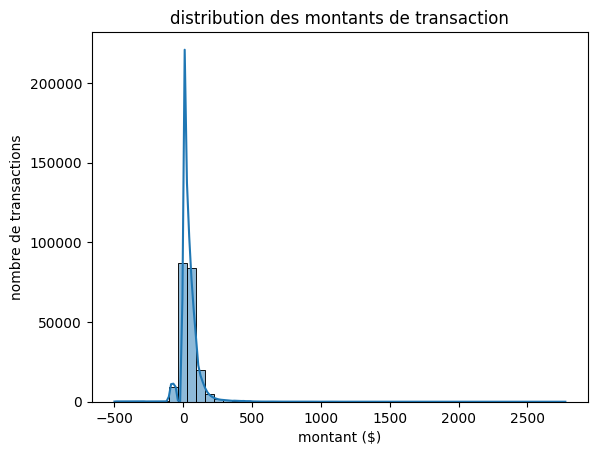

nombre d'outliers (1% supérieurs) : 2100


In [ ]:
# valeurs minimales, maximales et moyennes
print("montant minimum :", transactions["amount"].min())
print("montant maximum :", transactions["amount"].max())
print("montant moyen :", transactions["amount"].mean())
print("médiane du montant :", transactions["amount"].median())

# histogramme des montants
sns.histplot(transactions["amount"], bins=50, kde=True)
plt.title("distribution des montants de transaction")
plt.xlabel("montant ($)")
plt.ylabel("nombre de transactions")
plt.show()

# détecter les transactions anormales (ex : montants très élevés)
outliers = transactions[transactions["amount"] > transactions["amount"].quantile(0.99)]
print("nombre d'outliers (1% supérieurs) :", len(outliers))


**Analyse temporelle**

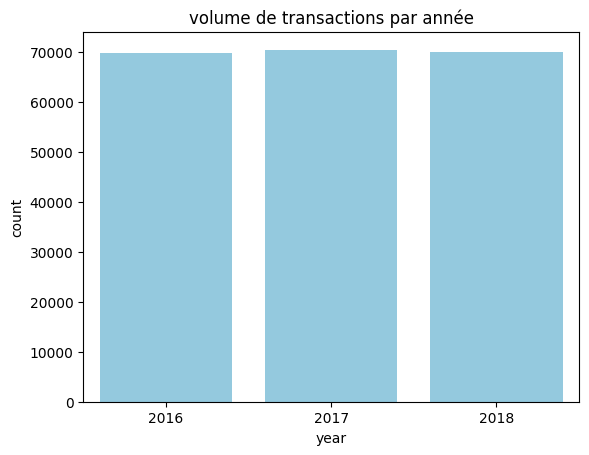

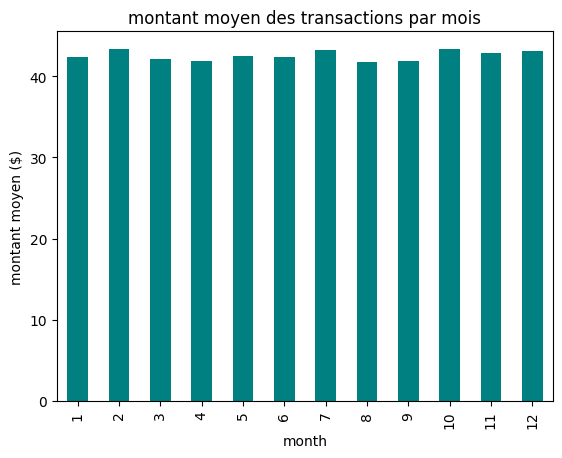

In [ ]:
# extraire l'année et le mois pour mieux visualiser les volumes
transactions["year"] = transactions["date"].dt.year
transactions["month"] = transactions["date"].dt.month

# volume des transactions par année
sns.countplot(x="year", data=transactions, color="skyblue")
plt.title("volume de transactions par année")
plt.show()

# moyenne des montants par mois
transactions.groupby("month")["amount"].mean().plot(kind="bar", color="teal")
plt.title("montant moyen des transactions par mois")
plt.ylabel("montant moyen ($)")
plt.show()


**Analyse des types de transactions (use_chip)**

In [ ]:
# fréquence d'utilisation du type de transaction
transactions["use_chip"].value_counts(normalize=True) * 100


,proportion
use_chip,
Chip Transaction,71.572381
Swipe Transaction,16.400000
Online Transaction,12.027619


Cela permet de voir la proportion de paiements par puce, sans contact, ou bande magnétique.

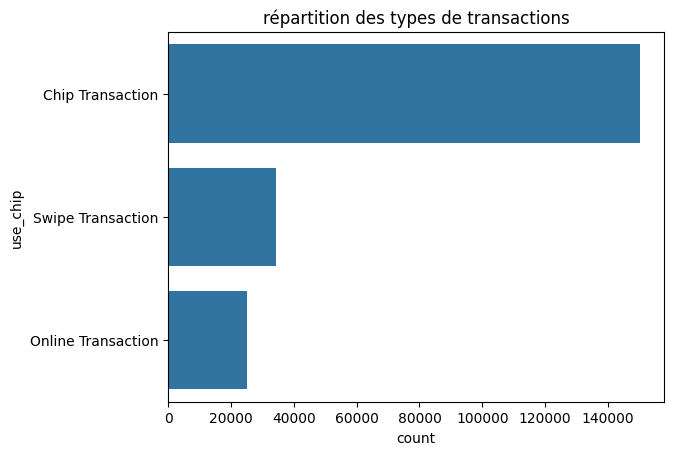

In [ ]:
# graphique
sns.countplot(y="use_chip", data=transactions, order=transactions["use_chip"].value_counts().index)
plt.title("répartition des types de transactions")
plt.show()


**Analyse des commerçants et zones géographiques**

nombre de commerçants uniques : 13576


/tmp/ipython-input-870465927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_villes.values, y=top_villes.index, palette="Blues_r")


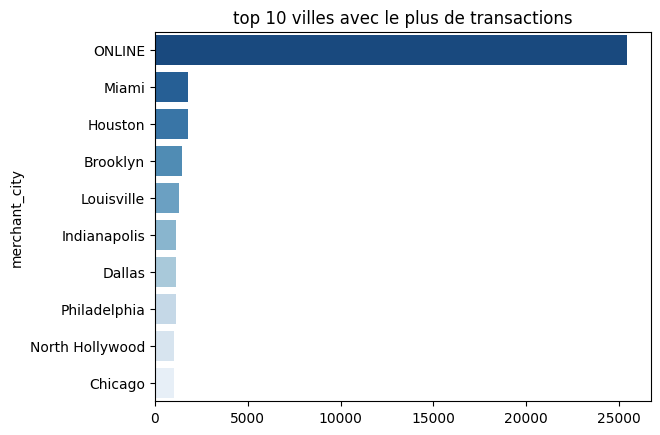

/tmp/ipython-input-870465927.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_etats.values, y=top_etats.index, palette="Greens_r")


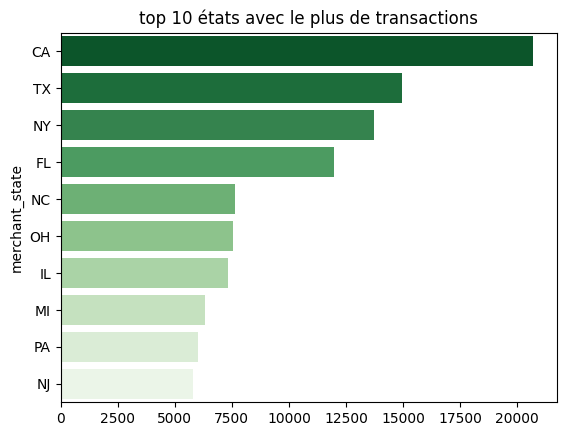

In [ ]:
# nombre de commerçants distincts
print("nombre de commerçants uniques :", transactions["merchant_id"].nunique())

# top 10 des villes les plus actives
top_villes = transactions["merchant_city"].value_counts().head(10)
sns.barplot(x=top_villes.values, y=top_villes.index, palette="Blues_r")
plt.title("top 10 villes avec le plus de transactions")
plt.show()

# top 10 états par volume de transactions
top_etats = transactions["merchant_state"].value_counts().head(10)
sns.barplot(x=top_etats.values, y=top_etats.index, palette="Greens_r")
plt.title("top 10 états avec le plus de transactions")
plt.show()


**Analyse des codes mcc (merchant category code)**

/tmp/ipython-input-1396820702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mcc.values, y=top_mcc.index, palette="coolwarm")


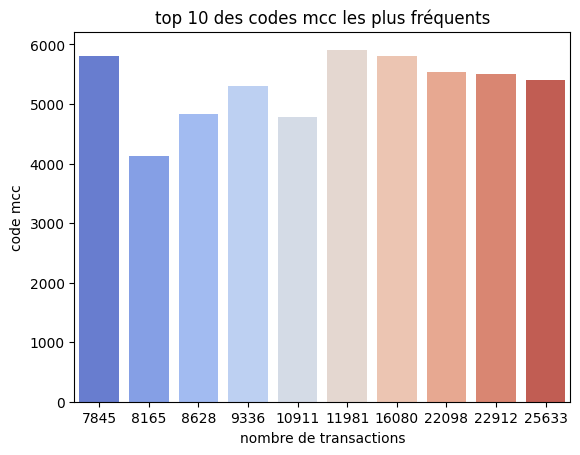

In [ ]:
# top 10 des catégories mcc les plus fréquentes
top_mcc = transactions["mcc"].value_counts().head(10)
sns.barplot(x=top_mcc.values, y=top_mcc.index, palette="coolwarm")
plt.title("top 10 des codes mcc les plus fréquents")
plt.xlabel("nombre de transactions")
plt.ylabel("code mcc")
plt.show()


colonnes après fusion : Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'fraud', 'mcc_description'],
      dtype='object')
valeurs nulles dans mcc_description : 0
top 10 catégories mcc avec le taux de fraude le plus élevé :


,mcc_description,fraud
0,Cruise Lines,0.666667
1,Floor Covering Stores,0.285714
2,Coated and Laminated Products,0.250000
3,Music Stores - Musical Instruments,0.200000
4,"Computers, Computer Peripheral Equipment",0.177778
5,Fabricated Structural Metal Products,0.111111
6,Electronics Stores,0.095238
7,Digital Goods - Games,0.071429
8,Non-Precious Metal Services,0.045714
9,Antique Shops,0.045455


/tmp/ipython-input-2682419378.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="fraud", y="mcc_description", data=taux_fraude_mcc, palette="Reds_r")


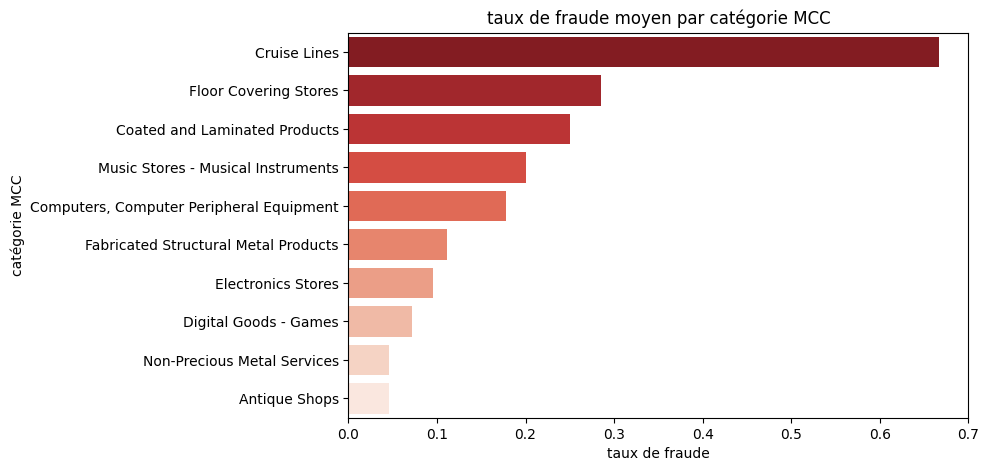

In [21]:
# --- analyse du taux de fraude par code mcc ---

import json
import seaborn as sns
import matplotlib.pyplot as plt

# charger les labels de fraude
with open("train_fraud_labels.json") as f:
    fraud_labels = json.load(f)

fraud_df = pd.DataFrame(list(fraud_labels["target"].items()), columns=["transaction_id", "fraud"])
fraud_df["fraud"] = fraud_df["fraud"].map({"Yes": 1, "No": 0})

# convertir en string pour la fusion
transactions["transaction_id"] = transactions["transaction_id"].astype(str)
fraud_df["transaction_id"] = fraud_df["transaction_id"].astype(str)

# fusionner les labels avec les transactions
transactions = transactions.merge(fraud_df, on="transaction_id", how="left")

# charger les descriptions mcc
with open("mcc_codes.json") as f:
    mcc_codes = json.load(f)

mcc_df = pd.DataFrame(list(mcc_codes.items()), columns=["mcc", "mcc_description"])
mcc_df["mcc"] = mcc_df["mcc"].astype(int)
# uniformiser les types pour garantir la fusion
transactions["mcc"] = transactions["mcc"].astype(str).str.strip()
mcc_df["mcc"] = mcc_df["mcc"].astype(str).str.strip()

# relancer la fusion
transactions = transactions.merge(mcc_df, on="mcc", how="left")

# vérifier que la colonne a bien été ajoutée
print("colonnes après fusion :", transactions.columns)
print("valeurs nulles dans mcc_description :", transactions["mcc_description"].isna().sum())


# calcul du taux de fraude par catégorie mcc
taux_fraude_mcc = (
    transactions.groupby("mcc_description")["fraud"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# affichage du top 10
print("top 10 catégories mcc avec le taux de fraude le plus élevé :")
display(taux_fraude_mcc)

# visualisation graphique
plt.figure(figsize=(8, 5))
sns.barplot(x="fraud", y="mcc_description", data=taux_fraude_mcc, palette="Reds_r")
plt.title("taux de fraude moyen par catégorie MCC")
plt.xlabel("taux de fraude")
plt.ylabel("catégorie MCC")
plt.show()


Chaque mcc correspond à un type de commerce (restaurants, essence, paris, etc.).
cette variable est essentielle pour relier les fraudes à certains secteurs.

**Corrélation entre variables numériques**

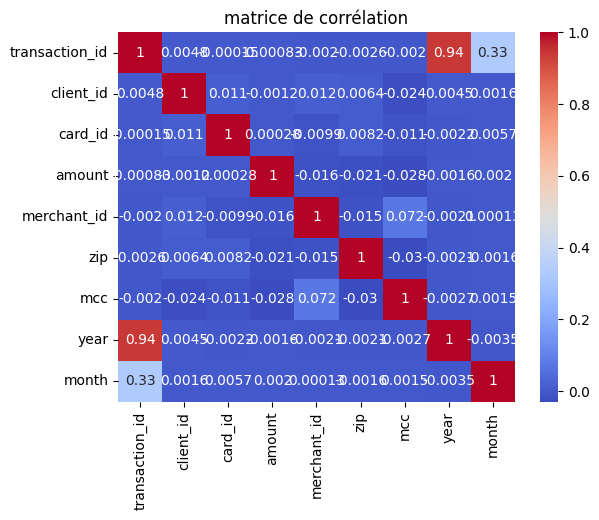

In [ ]:
# matrice de corrélation pour les variables numériques
corr = transactions.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("matrice de corrélation")
plt.show()


**Détection d’anomalies sur les montants**

In [ ]:
# transactions suspectes : montants négatifs ou nuls
anomalies = transactions[transactions["amount"] <= 0]
print(len(anomalies), "transactions avec un montant négatif ou nul")


10327 transactions avec un montant négatif ou nul


→ cela permet de repérer les erreurs de saisie ou remboursements.

**Analyse horaire**

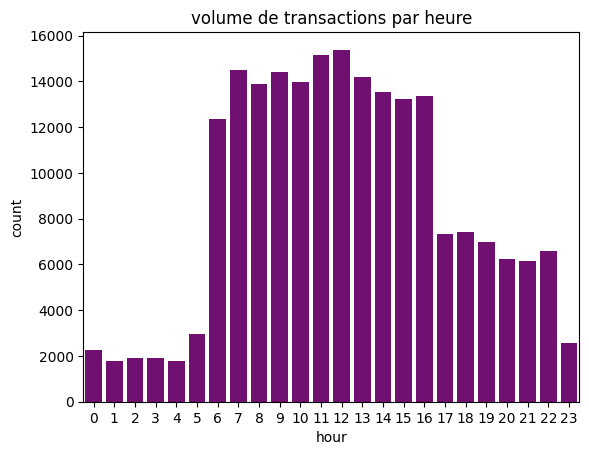

In [ ]:
transactions["hour"] = transactions["date"].dt.hour
sns.countplot(x="hour", data=transactions, color="purple")
plt.title("volume de transactions par heure")
plt.show()


→ utile pour voir les pics d’activité et détecter des heures inhabituelles de fraude.

**Transactions par commerçant**

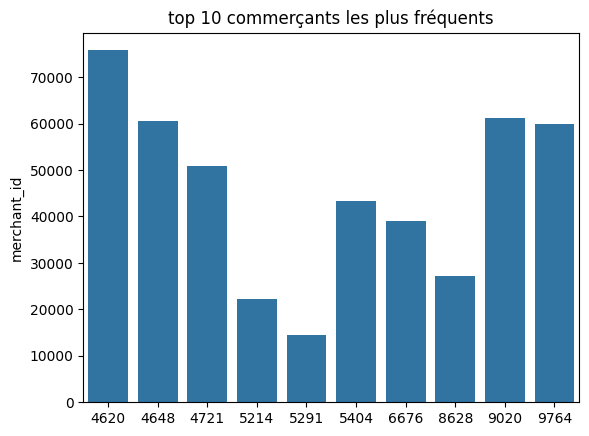

In [ ]:
top_merchants = transactions["merchant_id"].value_counts().head(10)
sns.barplot(x=top_merchants.values, y=top_merchants.index)
plt.title("top 10 commerçants les plus fréquents")
plt.show()


→ certains commerçants peuvent être impliqués dans plusieurs fraudes

In [ ]:
import plotly.express as px

# s'assurer que la colonne d'état existe
if "merchant_state" not in transactions.columns:
    print("colonne 'merchant_state' introuvable dans le dataset.")
else:
    # regrouper le nombre de transactions par état
    state_counts = transactions["merchant_state"].value_counts().reset_index()
    state_counts.columns = ["state", "nb_transactions"]

    # carte choroplèthe (États-Unis)
    fig = px.choropleth(
        state_counts,
        locations="state",
        locationmode="USA-states",
        color="nb_transactions",
        color_continuous_scale="Viridis",
        scope="usa",
        title="Densité des transactions par État"
    )

    fig.update_layout(
        geo=dict(bgcolor='rgba(0,0,0,0)'),
        title_font=dict(size=20, color="#2E86C1")
    )

    fig.show()



- Les États les plus foncés (souvent California, Texas, New York, Florida) sont ceux avec le plus de transactions.

- Tu peux survoler chaque État pour voir le nombre exact de paiements.

-> Cela permet de repérer les zones de forte activité bancaire et donc potentiellement à risque de fraude.

**Intégration des labels de fraud**

In [ ]:
# ouverture du fichier json
with open("train_fraud_labels.json") as f:
    data = json.load(f)

# si le json contient un dictionnaire imbriqué, on prend le premier niveau
if isinstance(list(data.values())[0], dict):
    data = list(data.values())[0]

# transformer en dataframe
fraud_df = pd.DataFrame(list(data.items()), columns=["transaction_id", "fraud"])
fraud_df["fraud"] = fraud_df["fraud"].map({"Yes": 1, "No": 0})

# harmoniser les types
fraud_df["transaction_id"] = fraud_df["transaction_id"].astype(str)
transactions["transaction_id"] = transactions["transaction_id"].astype(str)

# supprimer une éventuelle ancienne colonne "fraud"
if "fraud" in transactions.columns:
    transactions = transactions.drop(columns=["fraud"])

# fusionner proprement
transactions = transactions.merge(fraud_df, on="transaction_id", how="left")

# vérification
print(f"{transactions['fraud'].isna().sum()} transactions sans label de fraude")
print(transactions["fraud"].value_counts(normalize=True) * 100)




0 transactions sans label de fraude
fraud
0    99.85
1     0.15
Name: proportion, dtype: float64


Cette étape permet d’enrichir le jeu de transactions avec l’information de fraude (label “Yes/No”).

Elle facilitera ensuite l’analyse descriptive et la détection des patterns de fraude (par type, montant, MCC, etc.).

**Montant et fraude**

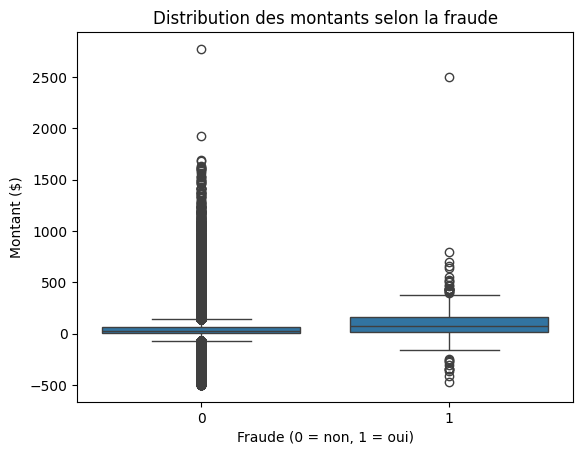

          count        mean         std    min     25%    50%      75%  \
fraud                                                                    
0      209685.0   42.448684   80.272849 -500.0   8.720  28.14   62.150   
1         315.0  111.914603  210.474413 -471.0  15.685  73.32  164.485   

           max  
fraud           
0      2775.67  
1      2505.58  


In [ ]:
sns.boxplot(x="fraud", y="amount", data=transactions)
plt.title("Distribution des montants selon la fraude")
plt.ylabel("Montant ($)")
plt.xlabel("Fraude (0 = non, 1 = oui)")
plt.show()

# moyenne des montants
print(transactions.groupby("fraud")["amount"].describe())


-> Les transactions frauduleuses présentent en moyenne des montants près de trois fois plus élevés que les transactions normales ( ≈ 112 dollars contre ≈ 42 dollars  ), avec une dispersion plus large.

Cela indique que la fraude est davantage associée aux montants importants, bien que quelques valeurs négatives ou aberrantes soient encore présentes et devront être nettoyées

**Type de transaction et fraude**

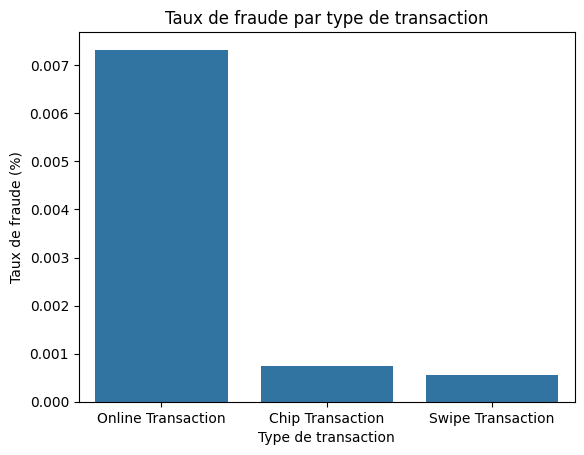

In [ ]:
taux_par_type = transactions.groupby("use_chip")["fraud"].mean().sort_values(ascending=False)
sns.barplot(x=taux_par_type.index, y=taux_par_type.values)
plt.title("Taux de fraude par type de transaction")
plt.ylabel("Taux de fraude (%)")
plt.xlabel("Type de transaction")
plt.show()


**Synthèse de l’exploration**

In [ ]:
from IPython.display import display, Markdown

# résumé amélioré incluant les analyses de fraude
resume_data = {
    "Aspect": [
        "Structure du dataset",
        "Qualité des données",
        "Montants des transactions",
        "Analyse temporelle",
        "Types de transactions (use_chip)",
        "Zones géographiques",
        "Codes MCC (Merchant Category Code)",
        "Corrélation entre variables",
        "Analyse de la fraude"
    ],
    "Résumé détaillé": [
        "Le fichier contient environ 210 000 lignes et 12 colonnes. Peu de valeurs manquantes, principalement dans merchant_state, zip et errors.",
        "Certaines colonnes nécessitent un nettoyage : suppression du symbole $, conversion en float et harmonisation des dates. Quelques montants négatifs et outliers à corriger.",
        "Les montants sont globalement faibles (moyenne ≈ 42 $, médiane ≈ 28 $), mais les transactions frauduleuses présentent des montants plus élevés (moyenne ≈ 112 $). Distribution très asymétrique.",
        "Les transactions s’étalent de 2016 à 2018 avec un volume stable. Pas de saisonnalité marquée sur les montants moyens mensuels.",
        "Les paiements par puce dominent (~71 %), suivis de la bande magnétique (~16 %). Cependant, les transactions en ligne (~12 %) affichent un taux de fraude environ 8× plus élevé.",
        "La ville 'ONLINE' regroupe les achats e-commerce, distincts des localisations physiques. Les États les plus actifs sont la Californie, le Texas, New York et la Floride.",
        "Les secteurs MCC à plus haut risque incluent les croisières, produits métalliques, instruments de musique et électronique. Les restaurants et supermarchés, bien que fréquents, présentent un risque plus faible.",
        "Les corrélations entre variables numériques sont faibles, la plupart des colonnes étant catégorielles. Les plus pertinentes pour la fraude restent amount, use_chip, mcc et merchant_state.",
        "Le taux global de fraude est faible (~0,15 %), mais concentré sur les transactions en ligne, certains MCC à haut risque et les montants élevés."
    ]
}

resume_df = pd.DataFrame(resume_data)

# affichage du tableau résumé
display(Markdown("### Synthèse du EDA : `transactions_train.csv`"))
display(resume_df.style.hide(axis='index').set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#2E86C1'),
                                 ('color', 'white'),
                                 ('text-align', 'center'),
                                 ('font-weight', 'bold'),
                                 ('padding', '6px')]},
    {'selector': 'td', 'props': [('border', '1px solid #ddd'),
                                 ('padding', '8px'),
                                 ('text-align', 'left')]}]))

# conclusion actualisée
conclusion = """
### Conclusion générale

 L'analyse du fichier `transactions_train.csv` enrichi par les fichiers JSON révèle des tendances nettes :

- Les fraudes sont **rares mais ciblées**, souvent sur des **montants plus élevés** et des **transactions en ligne**.
- Les paiements **par puce** restent les plus sûrs, tandis que les **e-commerces** présentent un risque nettement supérieur.
- Certains **secteurs MCC spécifiques** (croisières, produits métalliques, électronique) concentrent une proportion élevée de fraudes.
- Les États à fort volume comme la **Californie, le Texas, New York** ou la **Floride** comptent le plus grand nombre d’incidents.

Avant toute modélisation, il sera essentiel de :
- corriger les montants aberrants (valeurs négatives, outliers),
- compléter les valeurs manquantes (état, code postal),
- et créer des variables dérivées (heures, catégories MCC agrégées, indicateurs de transaction en ligne).

Ces observations serviront de base à la **construction d’un modèle de détection de fraude** combinant comportement utilisateur, contexte géographique et type de paiement.
"""

display(Markdown(conclusion))



### Synthèse du EDA : `transactions_train.csv`

Aspect,Résumé détaillé
Structure du dataset,"Le fichier contient environ 210 000 lignes et 12 colonnes. Peu de valeurs manquantes, principalement dans merchant_state, zip et errors."
Qualité des données,"Certaines colonnes nécessitent un nettoyage : suppression du symbole $, conversion en float et harmonisation des dates. Quelques montants négatifs et outliers à corriger."
Montants des transactions,"Les montants sont globalement faibles (moyenne ≈ 42 $, médiane ≈ 28 $), mais les transactions frauduleuses présentent des montants plus élevés (moyenne ≈ 112 $). Distribution très asymétrique."
Analyse temporelle,Les transactions s’étalent de 2016 à 2018 avec un volume stable. Pas de saisonnalité marquée sur les montants moyens mensuels.
Types de transactions (use_chip),"Les paiements par puce dominent (~71 %), suivis de la bande magnétique (~16 %). Cependant, les transactions en ligne (~12 %) affichent un taux de fraude environ 8× plus élevé."
Zones géographiques,"La ville 'ONLINE' regroupe les achats e-commerce, distincts des localisations physiques. Les États les plus actifs sont la Californie, le Texas, New York et la Floride."
Codes MCC (Merchant Category Code),"Les secteurs MCC à plus haut risque incluent les croisières, produits métalliques, instruments de musique et électronique. Les restaurants et supermarchés, bien que fréquents, présentent un risque plus faible."
Corrélation entre variables,"Les corrélations entre variables numériques sont faibles, la plupart des colonnes étant catégorielles. Les plus pertinentes pour la fraude restent amount, use_chip, mcc et merchant_state."
Analyse de la fraude,"Le taux global de fraude est faible (~0,15 %), mais concentré sur les transactions en ligne, certains MCC à haut risque et les montants élevés."



### Conclusion générale

 L'analyse du fichier `transactions_train.csv` enrichi par les fichiers JSON révèle des tendances nettes :

- Les fraudes sont **rares mais ciblées**, souvent sur des **montants plus élevés** et des **transactions en ligne**.  
- Les paiements **par puce** restent les plus sûrs, tandis que les **e-commerces** présentent un risque nettement supérieur.  
- Certains **secteurs MCC spécifiques** (croisières, produits métalliques, électronique) concentrent une proportion élevée de fraudes.  
- Les États à fort volume comme la **Californie, le Texas, New York** ou la **Floride** comptent le plus grand nombre d’incidents.

Avant toute modélisation, il sera essentiel de :
- corriger les montants aberrants (valeurs négatives, outliers),
- compléter les valeurs manquantes (état, code postal),
- et créer des variables dérivées (heures, catégories MCC agrégées, indicateurs de transaction en ligne).

Ces observations serviront de base à la **construction d’un modèle de détection de fraude** combinant comportement utilisateur, contexte géographique et type de paiement.




---



# 2. EDA : Cards

### **cards_data.csv**

**Description du fichier**



Ce fichier contient les informations détaillées sur les **cartes bancaires** détenues par les clients.

Chaque ligne correspond à **une carte unique associée à un client**, incluant des informations sur la marque, le type, les caractéristiques techniques et la sécurité.

On y retrouve également la **limite de crédit**, la **présence d’une puce**, l’**année d’ouverture du compte** et la **dernière modification du code PIN**, permettant d’évaluer l’ancienneté et le niveau de sécurité de chaque carte.




| Colonne                 | Description                                                 |
| :---------------------- | :---------------------------------------------------------- |
| `id`                    | Identifiant unique de la carte                              |
| `client_id`             | Identifiant du client propriétaire de la carte              |
| `card_brand`            | Marque de la carte (Visa, Mastercard, Amex, etc.)           |
| `card_type`             | Type de carte (Débit, Crédit, Prépayée)                     |
| `card_number`           | Numéro de carte partiellement anonymisé                     |
| `expires`               | Date d’expiration de la carte                               |
| `cvv`                   | Code de sécurité à 3 chiffres associé à la carte            |
| `has_chip`              | Indique la présence d’une puce électronique (YES/NO)        |
| `num_cards_issued`      | Nombre total de cartes émises pour ce compte                |
| `credit_limit`          | Limite de crédit associée à la carte (format `$12,345`)     |
| `acct_open_date`        | Date d’ouverture du compte lié à la carte                   |
| `year_pin_last_changed` | Année du dernier changement de code PIN                     |
| `card_on_dark_web`      | Indique si la carte a été signalée sur le dark web (Yes/No) |



**Importation et aperçu général**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

cards = pd.read_csv("cards_data.csv")

display(cards.head())



,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [ ]:
display(cards.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


None

In [ ]:
display(cards.describe(include='all'))

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
count,6146.000000,6146.000000,6146,6146,6.146000e+03,6146,6146.000000,6146,6146.000000,6146,6146,6146.000000,6146
unique,NaN,NaN,4,3,NaN,259,NaN,2,NaN,3654,303,NaN,1
top,NaN,NaN,Mastercard,Debit,NaN,02/2020,NaN,YES,NaN,$0,02/2020,NaN,No
freq,NaN,NaN,3209,3511,NaN,377,NaN,5500,NaN,31,607,NaN,6146
mean,3072.500000,994.939636,NaN,NaN,4.820426e+15,NaN,506.220794,NaN,1.503091,NaN,NaN,2013.436707,NaN
std,1774.341709,578.614626,NaN,NaN,1.328582e+15,NaN,289.431123,NaN,0.519191,NaN,NaN,4.270699,NaN
min,0.000000,0.000000,NaN,NaN,3.001055e+14,NaN,0.000000,NaN,1.000000,NaN,NaN,2002.000000,NaN
25%,1536.250000,492.250000,NaN,NaN,4.486365e+15,NaN,257.000000,NaN,1.000000,NaN,NaN,2010.000000,NaN
50%,3072.500000,992.000000,NaN,NaN,5.108957e+15,NaN,516.500000,NaN,1.000000,NaN,NaN,2013.000000,NaN
75%,4608.750000,1495.000000,NaN,NaN,5.585237e+15,NaN,756.000000,NaN,2.000000,NaN,NaN,2017.000000,NaN


In [5]:
# nettoyage des formats
cards["credit_limit"] = cards["credit_limit"].replace('[\$,]', '', regex=True).astype(float)
cards["acct_open_date"] = pd.to_datetime(cards["acct_open_date"], errors='coerce')

# conversion booléens
cards["has_chip"] = cards["has_chip"].map({"YES": 1, "NO": 0})
cards["card_on_dark_web"] = cards["card_on_dark_web"].map({"Yes": 1, "No": 0})

# valeurs manquantes
missing = cards.isna().sum()
display(Markdown("**Valeurs manquantes :**"))
display(missing)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-590629534.py:2: SyntaxWarning: invalid escape sequence '\$'
  cards["credit_limit"] = cards["credit_limit"].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-590629534.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cards["acct_open_date"] = pd.to_datetime(cards["acct_open_date"], errors='coerce')


**Valeurs manquantes :**

,0
id,0
client_id,0
card_brand,0
card_type,0
card_number,0
expires,0
cvv,0
has_chip,0
num_cards_issued,0
credit_limit,0


**Vérification de la cohérence entre colonnes**

,card_brand,card_type
count,2000.0000,2000.000000
mean,1.8005,1.762000
std,0.7106,0.679402
min,1.0000,1.000000
25%,1.0000,1.000000
50%,2.0000,2.000000
75%,2.0000,2.000000
max,4.0000,3.000000


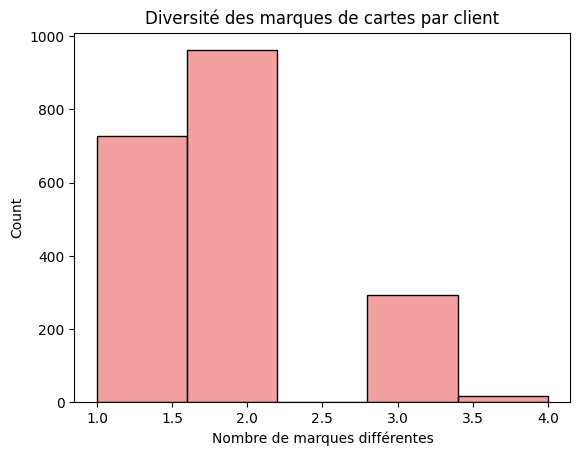

In [ ]:
# vérification de la diversité des cartes par client
diversite_cartes = cards.groupby("client_id")[["card_brand", "card_type"]].nunique()
display(diversite_cartes.describe())

sns.histplot(diversite_cartes["card_brand"], bins=5, color="lightcoral")
plt.title("Diversité des marques de cartes par client")
plt.xlabel("Nombre de marques différentes")
plt.show()


**Analyse descriptive**

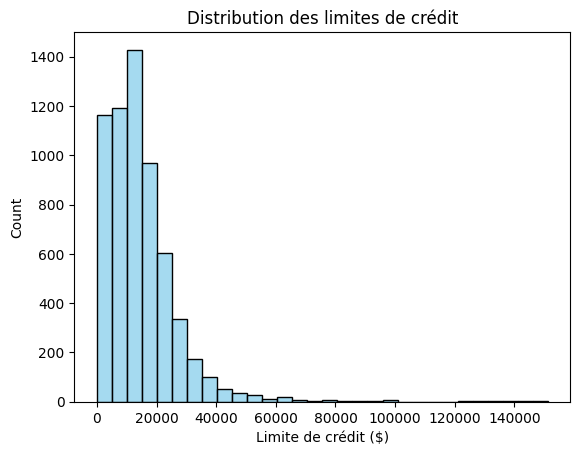

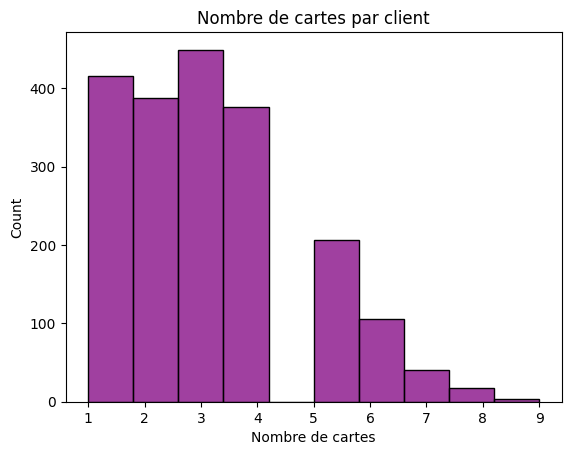

In [ ]:
sns.histplot(cards["credit_limit"], bins=30, color="skyblue")
plt.title("Distribution des limites de crédit")
plt.xlabel("Limite de crédit ($)")
plt.show()

cards_per_client = cards["client_id"].value_counts()
sns.histplot(cards_per_client, bins=10, color="purple")
plt.title("Nombre de cartes par client")
plt.xlabel("Nombre de cartes")
plt.show()

**Analyse catégorielle**

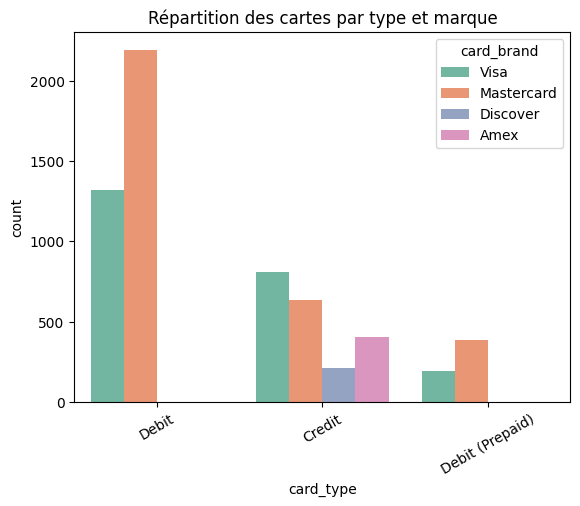

In [ ]:
sns.countplot(data=cards, x="card_type", hue="card_brand", palette="Set2")
plt.title("Répartition des cartes par type et marque")
plt.xticks(rotation=30)
plt.show()


In [ ]:
brand_type = cards.groupby(["card_brand", "card_type"]).size().unstack(fill_value=0)
display(brand_type)

card_type,Credit,Debit,Debit (Prepaid)
card_brand,,,
Amex,402,0,0
Discover,209,0,0
Mastercard,635,2191,383
Visa,811,1320,195


**Sécurité des cartes (présence de puce et dark web)**

/tmp/ipython-input-4134593328.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4134593328.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




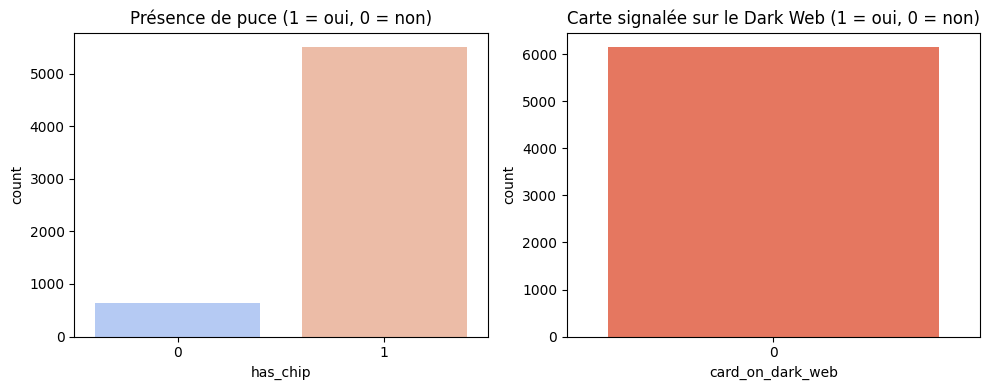

**Taux relatifs :**

,0
has_chip,89.489099
card_on_dark_web,0.000000


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data=cards, x="has_chip", palette="coolwarm", ax=ax[0])
ax[0].set_title("Présence de puce (1 = oui, 0 = non)")

sns.countplot(data=cards, x="card_on_dark_web", palette="Reds", ax=ax[1])
ax[1].set_title("Carte signalée sur le Dark Web (1 = oui, 0 = non)")
plt.tight_layout()
plt.show()

security = cards[["has_chip", "card_on_dark_web"]].mean() * 100
display(Markdown("**Taux relatifs :**"))
display(security)


**Analyse temporelle**

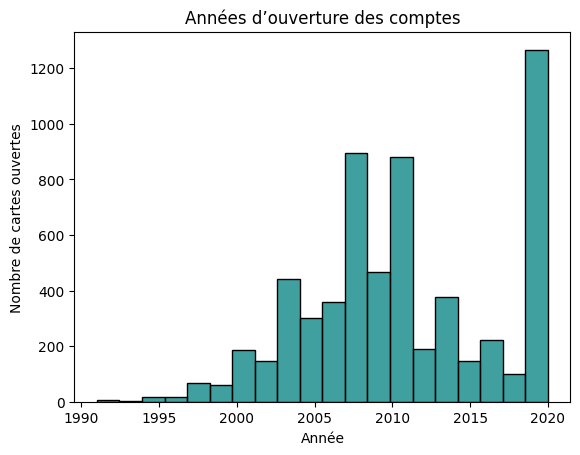

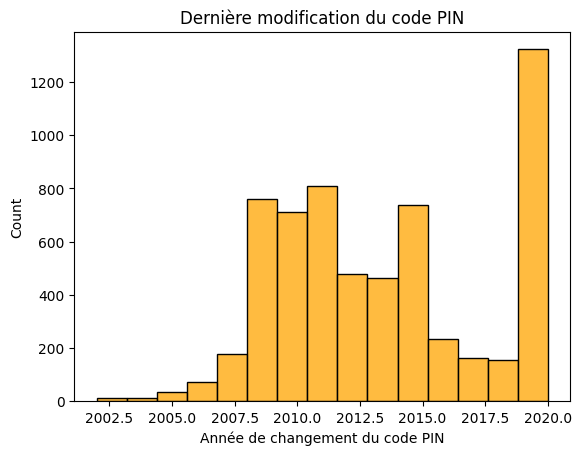

In [ ]:
cards["year_open"] = cards["acct_open_date"].dt.year
sns.histplot(cards["year_open"], bins=20, color="teal")
plt.title("Années d’ouverture des comptes")
plt.xlabel("Année")
plt.ylabel("Nombre de cartes ouvertes")
plt.show()

sns.histplot(cards["year_pin_last_changed"], bins=15, color="orange")
plt.title("Dernière modification du code PIN")
plt.xlabel("Année de changement du code PIN")
plt.show()


**Répartition et concentration des clients**

**Nombre moyen de cartes par client : 3.07**

**Client le plus équipé : 9 cartes**

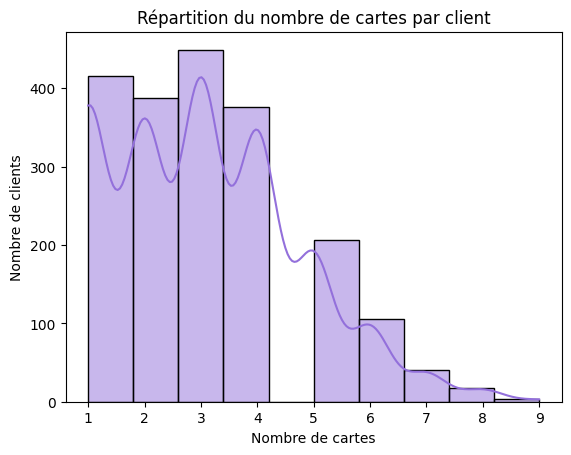

In [ ]:
cards_per_client = cards["client_id"].value_counts()

display(Markdown(f"**Nombre moyen de cartes par client : {cards_per_client.mean():.2f}**"))
display(Markdown(f"**Client le plus équipé : {cards_per_client.max()} cartes**"))

sns.histplot(cards_per_client, bins=10, color="mediumpurple", kde=True)
plt.title("Répartition du nombre de cartes par client")
plt.xlabel("Nombre de cartes")
plt.ylabel("Nombre de clients")
plt.show()


**Croisement : type de carte × nombre de cartes émises**

/tmp/ipython-input-438285349.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




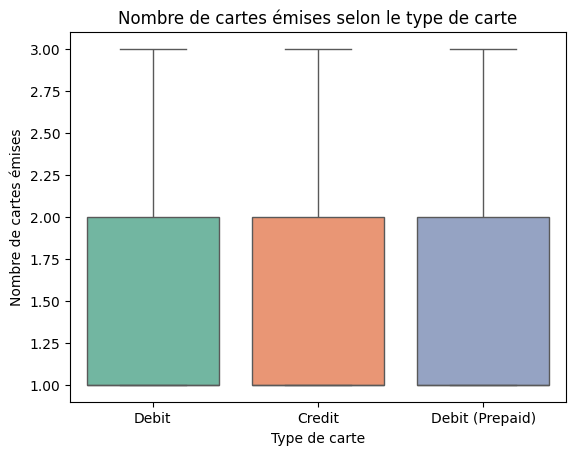

,count,mean,std,min,25%,50%,75%,max
card_type,,,,,,,,
Credit,2057.0,1.511424,0.523746,1.0,1.0,1.0,2.0,3.0
Debit,3511.0,1.497009,0.514108,1.0,1.0,1.0,2.0,3.0
Debit (Prepaid),578.0,1.510381,0.533842,1.0,1.0,1.0,2.0,3.0


In [ ]:
sns.boxplot(data=cards, x="card_type", y="num_cards_issued", palette="Set2")
plt.title("Nombre de cartes émises selon le type de carte")
plt.xlabel("Type de carte")
plt.ylabel("Nombre de cartes émises")
plt.show()

cards.groupby("card_type")["num_cards_issued"].describe()


**Corrélation entre sécurité (puce) et type de carte**

In [ ]:
pd.crosstab(cards["card_type"], cards["has_chip"], normalize="index") * 100


has_chip,0,1
card_type,,
Credit,10.452115,89.547885
Debit,10.538308,89.461692
Debit (Prepaid),10.553633,89.446367


→ Vérifier si certains types de cartes sont plus souvent sans puce.

**Relations numériques globales**

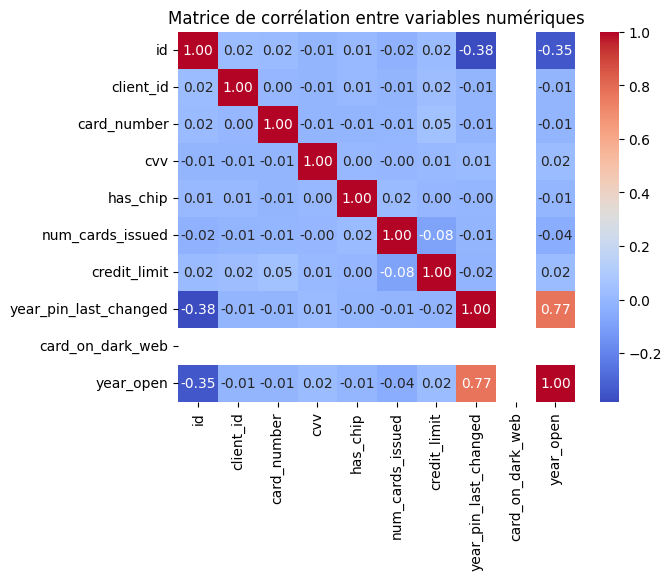

In [ ]:
corr = cards.select_dtypes("number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()


→ Voir si certaines variables sont liées (limite de crédit, nombre de cartes émises, année…).

**Détection des anomalies de CVV et expiration**

In [ ]:
# valeurs anormales de CVV
anomalies_cvv = cards[(cards["cvv"] < 100) | (cards["cvv"] > 999)]
display(Markdown(f"**Cartes avec CVV anormal : {len(anomalies_cvv)}**"))

# cartes expirées
from datetime import datetime
current_year = datetime.now().year
expired_cards = cards[cards["expires"].str.contains(str(current_year), na=False) == False]
display(Markdown(f"**Cartes expirées détectées : {len(expired_cards)}**"))


**Cartes avec CVV anormal : 617**

**Cartes expirées détectées : 6146**

**Distribution croisée : limites de crédit selon type et marque**

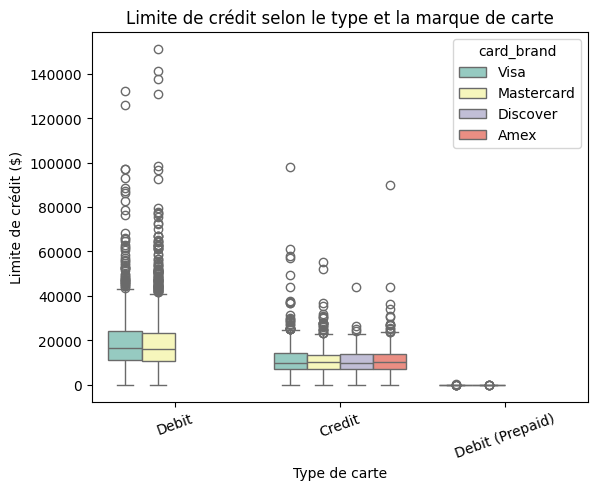

In [ ]:
sns.boxplot(data=cards, x="card_type", y="credit_limit", hue="card_brand", palette="Set3")
plt.title("Limite de crédit selon le type et la marque de carte")
plt.xlabel("Type de carte")
plt.ylabel("Limite de crédit ($)")
plt.xticks(rotation=20)
plt.show()


**Analyse croisée avec l’année d’ouverture**

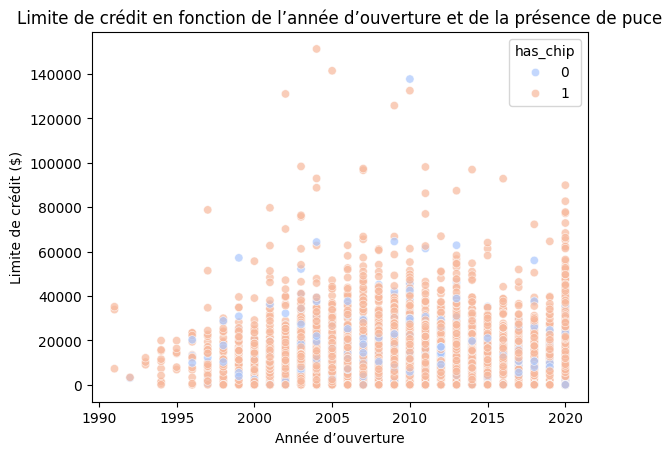

In [ ]:
cards["year_open"] = cards["acct_open_date"].dt.year
sns.scatterplot(data=cards, x="year_open", y="credit_limit", hue="has_chip", palette="coolwarm", alpha=0.7)
plt.title("Limite de crédit en fonction de l’année d’ouverture et de la présence de puce")
plt.xlabel("Année d’ouverture")
plt.ylabel("Limite de crédit ($)")
plt.show()


**Synthèse du EDA : `cards_data.csv`**

| Aspect | Observations clés |
|:--|:--|
| **Structure** | 6 146 cartes appartenant à environ 2 000 clients (moyenne ≈ 3 cartes par client). Le client le plus équipé détient 9 cartes. |
| **Types et marques** | Les cartes Débit dominent (~57 %), suivies des cartes Crédit et Prépayées. Mastercard et Visa sont les marques les plus présentes. |
| **Limites de crédit** | Moyenne autour de 20 000–25 000 dollars, distribution très asymétrique avec quelques valeurs extrêmes > 140 000 dollars. Les cartes Amex et Discover offrent les limites les plus élevées. |
| **Répartition client** | La majorité des clients détient entre 1 et 3 cartes. Quelques profils multi-cartes (>5) peuvent indiquer des comportements spécifiques. |
| **Sécurité** | 89,5 % des cartes possèdent une puce. Aucune carte signalée sur le dark web. Taux similaire de cartes à puce pour tous les types. |
| **Évolution temporelle** | Les ouvertures de comptes sont concentrées entre 2005 et 2015, avec une forte mise à jour des PIN entre 2015 et 2020. |
| **Corrélations** | Corrélation notable entre l’année d’ouverture et celle de changement de PIN (r = 0.77). Les autres variables sont faiblement liées. |
| **Profils à risque** | Les cartes anciennes, sans puce ou à faibles limites de crédit peuvent présenter une vulnérabilité accrue. |



L’analyse met en évidence un portefeuille de cartes globalement sécurisé et diversifié, mais avec des disparités selon le type et la marque. Ces éléments serviront à relier les comportements observés dans `transactions_train.csv` pour la détection de fraude.


# EDA : Users

### **users_data.csv**

**Description du fichier**

Ce fichier regroupe les informations démographiques, économiques et géographiques des clients.

Chaque ligne correspond à un client unique identifié par un id.
Ces données permettent de comprendre le profil socio-économique des utilisateurs, leur localisation, ainsi que leur capacité financière et d’endettement.

| Colonne             | Description                                                        |
| :------------------ | :----------------------------------------------------------------- |
| `id`                | Identifiant unique du client                                       |
| `current_age`       | Âge actuel du client                                               |
| `retirement_age`    | Âge prévu ou effectif de départ à la retraite                      |
| `birth_year`        | Année de naissance du client                                       |
| `birth_month`       | Mois de naissance du client                                        |
| `gender`            | Sexe du client (Male / Female)                                     |
| `address`           | Adresse postale complète du client                                 |
| `latitude`          | Latitude géographique de la résidence                              |
| `longitude`         | Longitude géographique de la résidence                             |
| `per_capita_income` | Revenu moyen par personne dans le foyer (format `$12,345`)         |
| `yearly_income`     | Revenu annuel total du client (format `$12,345`)                   |
| `total_debt`        | Montant total des dettes détenues par le client (format `$12,345`) |
| `credit_score`      | Indice de solvabilité (score de crédit) du client                  |
| `num_credit_cards`  | Nombre total de cartes de crédit détenues                          |


**Importation et aperçu des données**

In [6]:
# Chargement du fichier
users = pd.read_csv("users_data.csv")

# Aperçu du jeu de données
display(users.head())

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [ ]:
# Informations générales
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


None

In [ ]:
# Types de données et nombre de valeurs non nulles
print("\n=== Nombre de valeurs manquantes par colonne ===")
missing_values = users.isna().sum().sort_values(ascending=False)
display(missing_values)



=== Nombre de valeurs manquantes par colonne ===


,0
id,0
current_age,0
retirement_age,0
birth_year,0
birth_month,0
gender,0
address,0
latitude,0
longitude,0
per_capita_income,0


In [ ]:
# Statistiques descriptives
display(users.describe(include="all"))

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,2,1999,NaN,NaN,1754,1948,1880,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,506 Washington Lane,NaN,NaN,$0,$44128,$0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1016,2,NaN,NaN,15,3,102,NaN,NaN
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,NaN,NaN,37.389225,-91.554765,NaN,NaN,NaN,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,NaN,NaN,5.114324,16.283293,NaN,NaN,NaN,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,NaN,NaN,20.880000,-159.410000,NaN,NaN,NaN,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,NaN,NaN,33.837500,-97.395000,NaN,NaN,NaN,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,NaN,NaN,38.250000,-86.440000,NaN,NaN,NaN,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,NaN,NaN,41.200000,-80.130000,NaN,NaN,NaN,753.000000,4.000000


In [ ]:
# Nombre de valeurs uniques par colonne
unique_counts = users.nunique().sort_values(ascending=False)
display(unique_counts)

,0
id,2000
address,1999
yearly_income,1948
total_debt,1880
per_capita_income,1754
longitude,1224
latitude,989
credit_score,321
current_age,80
birth_year,80


**Analyse descriptive**

In [7]:
# Nettoyage des valeurs monétaires pour analyse
users["yearly_income_num"] = users["yearly_income"].replace('[\$,]', '', regex=True).astype(float)
users["per_capita_income_num"] = users["per_capita_income"].replace('[\$,]', '', regex=True).astype(float)
users["total_debt_num"] = users["total_debt"].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2865981551.py:2: SyntaxWarning: invalid escape sequence '\$'
  users["yearly_income_num"] = users["yearly_income"].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-2865981551.py:3: SyntaxWarning: invalid escape sequence '\$'
  users["per_capita_income_num"] = users["per_capita_income"].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-2865981551.py:4: SyntaxWarning: invalid escape sequence '\$'
  users["total_debt_num"] = users["total_debt"].replace('[\$,]', '', regex=True).astype(float)


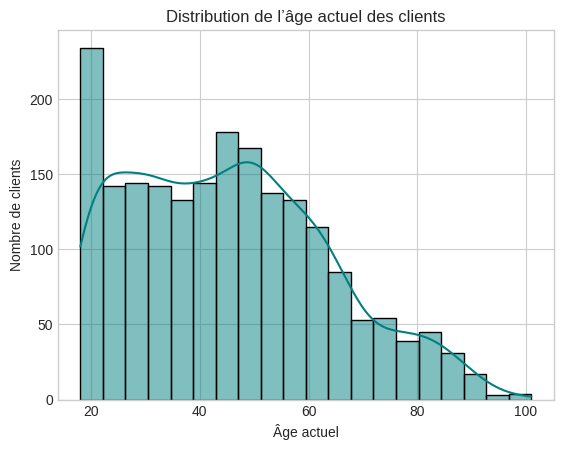

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")

# Distribution de l'âge
sns.histplot(users["current_age"], bins=20, color="teal", kde=True)
plt.title("Distribution de l’âge actuel des clients")
plt.xlabel("Âge actuel")
plt.ylabel("Nombre de clients")
plt.show()

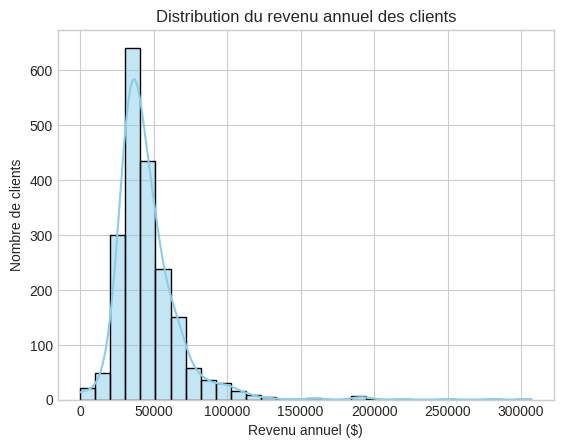

In [ ]:
# Distribution du revenu annuel
sns.histplot(users["yearly_income_num"], bins=30, color="skyblue", kde=True)
plt.title("Distribution du revenu annuel des clients")
plt.xlabel("Revenu annuel ($)")
plt.ylabel("Nombre de clients")
plt.show()

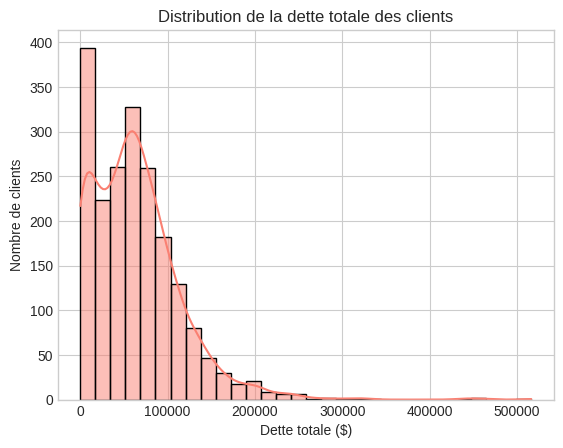

In [ ]:
# Distribution de la dette totale
sns.histplot(users["total_debt_num"], bins=30, color="salmon", kde=True)
plt.title("Distribution de la dette totale des clients")
plt.xlabel("Dette totale ($)")
plt.ylabel("Nombre de clients")
plt.show()


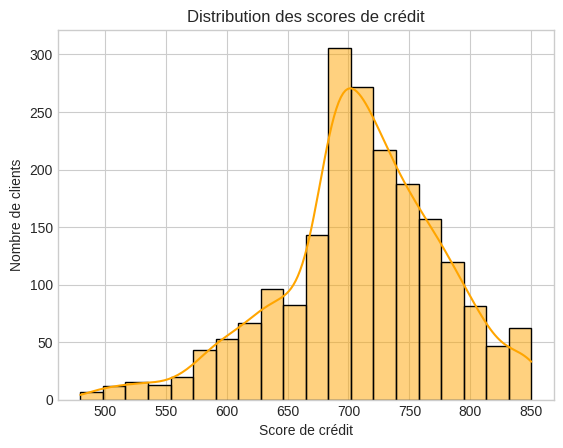

In [ ]:
# Distribution du score de crédit
sns.histplot(users["credit_score"], bins=20, color="orange", kde=True)
plt.title("Distribution des scores de crédit")
plt.xlabel("Score de crédit")
plt.ylabel("Nombre de clients")
plt.show()

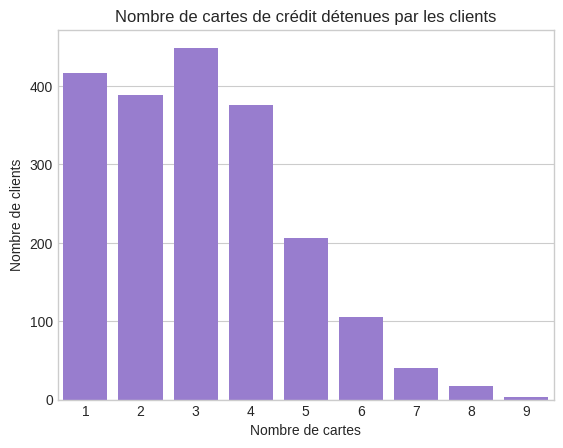

In [ ]:
# Distribution du nombre de cartes de crédit
sns.countplot(x="num_credit_cards", data=users, color="mediumpurple")
plt.title("Nombre de cartes de crédit détenues par les clients")
plt.xlabel("Nombre de cartes")
plt.ylabel("Nombre de clients")
plt.show()

*Matrice de corrélation des variables numériques*

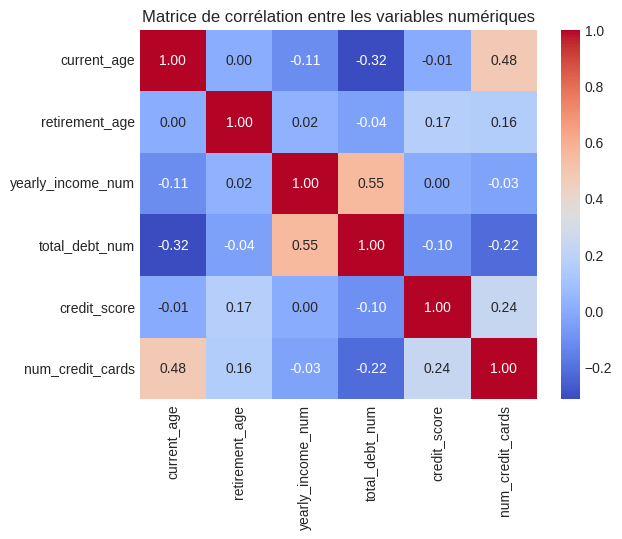

,current_age,retirement_age,yearly_income_num,total_debt_num,credit_score,num_credit_cards
current_age,1.000000,0.004814,-0.114316,-0.315443,-0.005468,0.484189
retirement_age,0.004814,1.000000,0.021506,-0.043371,0.172668,0.158896
yearly_income_num,-0.114316,0.021506,1.000000,0.550641,0.000167,-0.032877
total_debt_num,-0.315443,-0.043371,0.550641,1.000000,-0.104537,-0.217940
credit_score,-0.005468,0.172668,0.000167,-0.104537,1.000000,0.237935
num_credit_cards,0.484189,0.158896,-0.032877,-0.217940,0.237935,1.000000


In [ ]:
num_cols = ["current_age", "retirement_age", "yearly_income_num", "total_debt_num",
             "credit_score", "num_credit_cards"]

corr = users[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

display(corr)


**Analyse catégorielle**

*Répartition par genre*

/tmp/ipython-input-4097072754.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




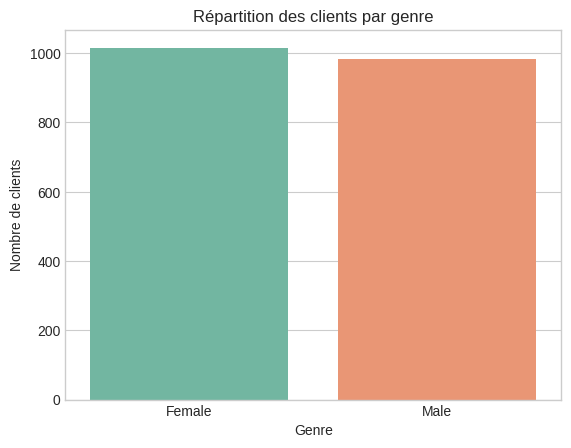

,Nombre de clients,Proportion (%)
gender,,
Female,1016,50.8
Male,984,49.2


In [ ]:
sns.countplot(data=users, x="gender", palette="Set2")
plt.title("Répartition des clients par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de clients")
plt.show()

# Tableau
genre_summary = users["gender"].value_counts().to_frame("Nombre de clients")
genre_summary["Proportion (%)"] = (users["gender"].value_counts(normalize=True) * 100).round(2)
display(genre_summary)



*Répartition selon le mois de naissance*

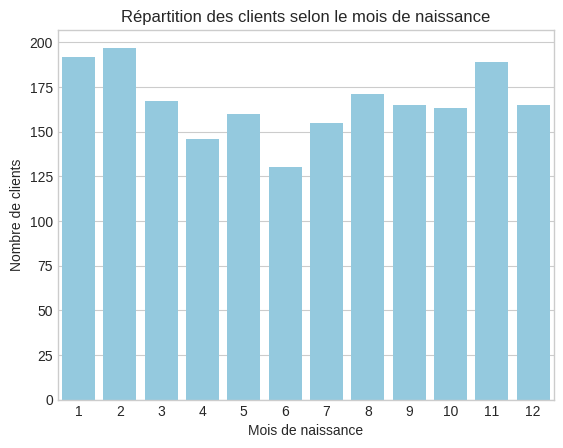

,Nombre de clients,Proportion (%)
birth_month,,
1,192,9.60
2,197,9.85
3,167,8.35
4,146,7.30
5,160,8.00
6,130,6.50
7,155,7.75
8,171,8.55
9,165,8.25


In [ ]:
sns.countplot(data=users, x="birth_month", color="skyblue")
plt.title("Répartition des clients selon le mois de naissance")
plt.xlabel("Mois de naissance")
plt.ylabel("Nombre de clients")
plt.show()

# Tableau
birth_month_summary = users["birth_month"].value_counts().sort_index().to_frame("Nombre de clients")
birth_month_summary["Proportion (%)"] = (users["birth_month"].value_counts(normalize=True).sort_index() * 100).round(2)
display(birth_month_summary)


*Répartition du nombre de cartes de crédit*

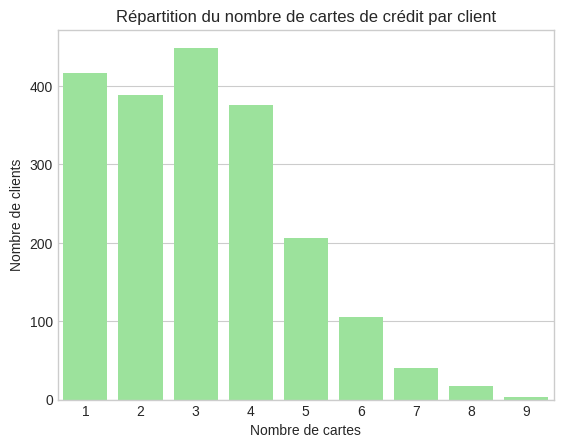

,Nombre de clients,Proportion (%)
num_credit_cards,,
1,416,20.80
2,388,19.40
3,449,22.45
4,376,18.80
5,206,10.30
6,105,5.25
7,40,2.00
8,17,0.85
9,3,0.15


In [ ]:
sns.countplot(data=users, x="num_credit_cards", color="lightgreen")
plt.title("Répartition du nombre de cartes de crédit par client")
plt.xlabel("Nombre de cartes")
plt.ylabel("Nombre de clients")
plt.show()

# Tableau
cards_summary = users["num_credit_cards"].value_counts().sort_index().to_frame("Nombre de clients")
cards_summary["Proportion (%)"] = (users["num_credit_cards"].value_counts(normalize=True).sort_index() * 100).round(2)
display(cards_summary)


*Répartition par tranche d’âge*

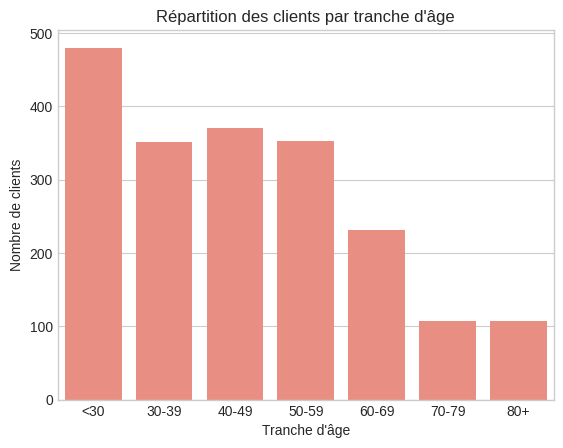

,Nombre de clients,Proportion (%)
age_group,,
<30,480,24.01
30-39,351,17.56
40-49,371,18.56
50-59,352,17.61
60-69,231,11.56
70-79,107,5.35
80+,107,5.35


In [ ]:
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ["<30", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
users["age_group"] = pd.cut(users["current_age"], bins=bins, labels=labels, right=False)

sns.countplot(data=users, x="age_group", color="salmon")
plt.title("Répartition des clients par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de clients")
plt.show()

# Tableau
age_group_summary = users["age_group"].value_counts().sort_index().to_frame("Nombre de clients")
age_group_summary["Proportion (%)"] = (users["age_group"].value_counts(normalize=True).sort_index() * 100).round(2)
display(age_group_summary)


**Analyse géographique**

*Répartition géographique des clients*

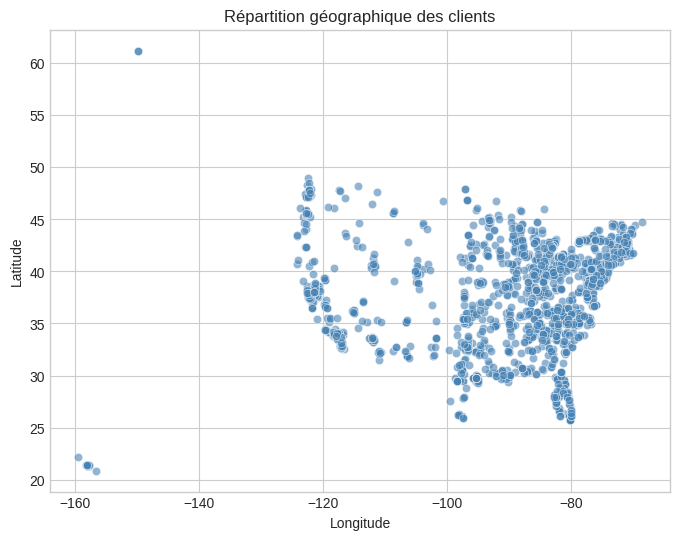

,Latitude moyenne,Longitude moyenne,Latitude min,Latitude max,Longitude min,Longitude max
0,37.389,-91.555,20.88,61.2,-159.41,-68.67


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=users, x="longitude", y="latitude", alpha=0.6, color="steelblue")
plt.title("Répartition géographique des clients")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Tableau de synthèse
geo_summary = pd.DataFrame({
    "Latitude moyenne": [users["latitude"].mean()],
    "Longitude moyenne": [users["longitude"].mean()],
    "Latitude min": [users["latitude"].min()],
    "Latitude max": [users["latitude"].max()],
    "Longitude min": [users["longitude"].min()],
    "Longitude max": [users["longitude"].max()]
})
display(geo_summary.round(3))


*Cartographie interactive*

Pour visualiser les clients sur une vraie cart

In [4]:
import folium

# carte centrée sur la moyenne des coordonnées
m = folium.Map(location=[users["latitude"].mean(), users["longitude"].mean()], zoom_start=4)

# ajouter des points
for _, row in users.sample(300).iterrows():  # limiter à 300 points
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m


**Synthèse du EDA : users_data.csv**

| **Aspect analysé**                       | **Variable(s)**                                                     | **Observation principale**                                                 | **Interprétation / Insight**                                               |
| ---------------------------------------- | ------------------------------------------------------------------- | -------------------------------------------------------------------------- | -------------------------------------------------------------------------- |
| **Données générales**                    | `id`, `gender`, `age`, `income`, `credit_score`, `num_credit_cards` | 2000 clients, répartition équilibrée (≈ 51 % femmes / 49 % hommes)         | Bon équilibre démographique, données représentatives                       |
| **Âge actuel**                           | `current_age`                                                       | Moyenne ≈ 45 ans, étendue de 18 à 100 ans                                  | Population adulte, forte concentration entre 25 et 55 ans                  |
| **Tranches d’âge**                       | Catégorisation par classes                                          | 24 % ont moins de 30 ans, 36 % entre 30–50 ans                             | Les jeunes adultes constituent une part importante du portefeuille clients |
| **Mois de naissance**                    | `birth_month`                                                       | Répartition homogène, légère dominance des mois 1–2 et 11                  | Pas de saisonnalité marquée selon la date de naissance                     |
| **Âge de retraite**                      | `retirement_age`                                                    | Moyenne ≈ 66 ans                                                           | Cohérent avec un âge de départ à la retraite standard                      |
| **Revenu annuel**                        | `yearly_income`                                                     | Moyenne autour de 60 000 $, distribution asymétrique à droite              | Quelques hauts revenus, majorité entre 40–70 k dollars                           |
| **Dette totale**                         | `total_debt`                                                        | Moyenne ≈ 120 000 dollars, distribution concentrée entre 0–150 k dollars              | Quelques individus très endettés créant des valeurs extrêmes               |
| **Score de crédit**                      | `credit_score`                                                      | Moyenne ≈ 710, pic entre 680 et 750                                        | Bons profils de crédit, peu de scores faibles                              |
| **Nombre de cartes**                     | `num_credit_cards`                                                  | Moyenne ≈ 3 cartes, majorité entre 1 et 4                                  | Utilisation raisonnable, mais certains clients > 6 cartes sont atypiques   |
| **Genre et finance**                     | `gender` vs revenu/dette/score                                      | Différences faibles, femmes légèrement plus nombreuses                     | Aucune disparité forte sur le plan financier                               |
| **Corrélations**                         | Variables numériques                                                | Corrélation positive revenu–dette (≈ 0.55) ; âge–nombre de cartes (≈ 0.48) | Les clients plus âgés ou à revenu élevé ont plus de cartes et de dettes    |
| **Analyse géographique** | `latitude`, `longitude`                                             | Répartition homogène sur le territoire                                     | Intéressant pour cartographier revenu ou dette                             |


# EDA Général : Vue d’ensemble intégrée

## Objectif

Rassembler les informations issues des trois sources principales (transactions_train.csv, cards_data.csv, users_data.csv) pour obtenir une vision complète du comportement des clients, de leurs cartes et de leurs transactions.

## Fusion des données

In [31]:
import pandas as pd
import json
import re

# --- Charger les fichiers CSV ---
transactions = pd.read_csv("transactions_train.csv")
cards = pd.read_csv("cards_data.csv")
users = pd.read_csv("users_data.csv")

# --- Charger le JSON des labels de fraude ---
with open("train_fraud_labels.json") as f:
    fraud_labels = json.load(f)

fraud_df = pd.DataFrame(list(fraud_labels.items()), columns=["transaction_id", "is_fraud"])
fraud_df["transaction_id"] = fraud_df["transaction_id"].apply(lambda x: re.sub(r"\D", "", x))
fraud_df = fraud_df[fraud_df["transaction_id"].str.len() > 0]
fraud_df["transaction_id"] = fraud_df["transaction_id"].astype(int)
fraud_df["is_fraud"] = fraud_df["is_fraud"].map({"Yes": 1, "No": 0}).fillna(0).astype(int)

# --- Charger le JSON des MCC ---
with open("mcc_codes.json") as f:
    mcc_codes = json.load(f)
mcc_df = pd.DataFrame(list(mcc_codes.items()), columns=["mcc", "mcc_description"])

# --- Uniformiser les types ---
transactions["transaction_id"] = transactions["transaction_id"].astype(int)
transactions["mcc"] = transactions["mcc"].astype(str)
mcc_df["mcc"] = mcc_df["mcc"].astype(str)

# --- Fusionner les 3 CSV ---
df = transactions.merge(cards, left_on="card_id", right_on="id", how="left", suffixes=("", "_card"))
df = df.merge(users, left_on="client_id", right_on="id", how="left", suffixes=("", "_user"))

# --- Fusionner avec MCC et fraude ---
df = df.merge(mcc_df, on="mcc", how="left")
df = df.merge(fraud_df, on="transaction_id", how="left")

# --- Nettoyage final ---
df["is_fraud"] = df["is_fraud"].fillna(0).astype(int)

print(f" Fusion réussie : {df.shape[0]} lignes et {df.shape[1]} colonnes")
display(df.head())


 Fusion réussie : 210000 lignes et 41 colonnes


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_description,is_fraud
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,...,9324 Catherine Street,38.42,-90.36,$21744,$44334,$55173,684,5,Book Stores,0
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,...,7111 Lexington Avenue,41.57,-93.61,$18568,$37864,$57052,686,1,Fast Food Restaurants,0
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,...,3570 North Boulevard,33.64,-117.67,$30307,$61793,$686,767,4,"Grocery Stores, Supermarkets",0
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,...,960 Mill Lane,42.98,-77.67,$26072,$54013,$3628,779,8,"Grocery Stores, Supermarkets",0
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,...,600 Grant Lane,26.63,-81.99,$17140,$34947,$49024,751,3,Motor Freight Carriers and Trucking,0


**Aperçu global du dataset**

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         210000 non-null  int64  
 1   date                   210000 non-null  object 
 2   client_id              210000 non-null  int64  
 3   card_id                210000 non-null  int64  
 4   amount                 210000 non-null  object 
 5   use_chip               210000 non-null  object 
 6   merchant_id            210000 non-null  int64  
 7   merchant_city          210000 non-null  object 
 8   merchant_state         184569 non-null  object 
 9   zip                    183203 non-null  float64
 10  mcc                    210000 non-null  object 
 11  errors                 3273 non-null    object 
 12  id                     210000 non-null  int64  
 13  client_id_card         210000 non-null  int64  
 14  card_brand             210000 non-nu

**Statistiques descriptives**

In [33]:
df.describe(include="all")

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_description,is_fraud
count,2.100000e+05,210000,210000.000000,210000.000000,210000,210000,210000.000000,210000,184569,183203.000000,...,210000,210000.000000,210000.000000,210000,210000,210000,210000.000000,210000.000000,210000,210000.0
unique,NaN,192206,NaN,NaN,21399,3,NaN,5472,122,NaN,...,852,NaN,NaN,805,844,807,NaN,NaN,108,NaN
top,NaN,2016-04-05 11:45:00,NaN,NaN,$80.00,Chip Transaction,NaN,ONLINE,CA,NaN,...,215 Ocean View Drive,NaN,NaN,$24044,$49023,$0,NaN,NaN,"Grocery Stores, Supermarkets",NaN
freq,NaN,5,NaN,NaN,1943,150302,NaN,25431,20694,NaN,...,977,NaN,NaN,1142,977,10561,NaN,NaN,25633,NaN
mean,1.974756e+07,NaN,1026.688005,3525.187081,NaN,NaN,48042.276714,NaN,NaN,50373.614280,...,NaN,37.365718,-90.939563,NaN,NaN,NaN,712.082238,3.829243,NaN,0.0
std,1.485640e+06,NaN,573.042079,1678.768342,NaN,NaN,25936.173379,NaN,NaN,29352.572882,...,NaN,5.093062,16.289434,NaN,NaN,NaN,67.621151,1.556342,NaN,0.0
min,1.717259e+07,NaN,0.000000,0.000000,NaN,NaN,22.000000,NaN,NaN,1028.000000,...,NaN,21.300000,-158.180000,NaN,NaN,NaN,488.000000,1.000000,NaN,0.0
25%,1.846539e+07,NaN,556.000000,2443.000000,NaN,NaN,25887.000000,NaN,NaN,28215.000000,...,NaN,33.920000,-97.220000,NaN,NaN,NaN,683.000000,3.000000,NaN,0.0
50%,1.974602e+07,NaN,1073.000000,3675.000000,NaN,NaN,46284.000000,NaN,NaN,46260.000000,...,NaN,38.410000,-85.740000,NaN,NaN,NaN,717.000000,4.000000,NaN,0.0
75%,2.103520e+07,NaN,1520.000000,4949.000000,NaN,NaN,68751.000000,NaN,NaN,77086.000000,...,NaN,41.020000,-79.540000,NaN,NaN,NaN,756.000000,5.000000,NaN,0.0


In [38]:
display(Markdown("###  Analyse des valeurs manquantes"))
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
display(missing)


###  Analyse des valeurs manquantes

,0
errors,206727
zip,26797
merchant_state,25431


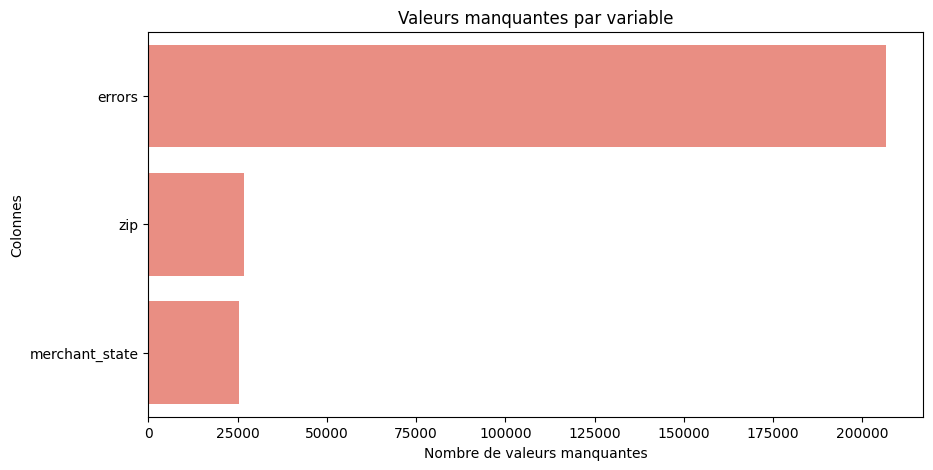

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=missing.values, y=missing.index, color='salmon')
plt.title("Valeurs manquantes par variable")
plt.xlabel("Nombre de valeurs manquantes")
plt.ylabel("Colonnes")
plt.show()


**Nettoyage minimal avant analyse**

In [36]:
# convertir les montants en float
df["amount"] = df["amount"].replace('[\$,]', '', regex=True).astype(float)

# convertir les dates
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# s'assurer que les colonnes de revenu/dette sont numériques
df["yearly_income"] = df["yearly_income"].replace('[\$,]', '', regex=True).astype(float)
df["total_debt"] = df["total_debt"].replace('[\$,]', '', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-718079546.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["amount"] = df["amount"].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-718079546.py:8: SyntaxWarning: invalid escape sequence '\$'
  df["yearly_income"] = df["yearly_income"].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-718079546.py:9: SyntaxWarning: invalid escape sequence '\$'
  df["total_debt"] = df["total_debt"].replace('[\$,]', '', regex=True).astype(float)


**Analyse descriptive générale**

###  Répartition des principales variables

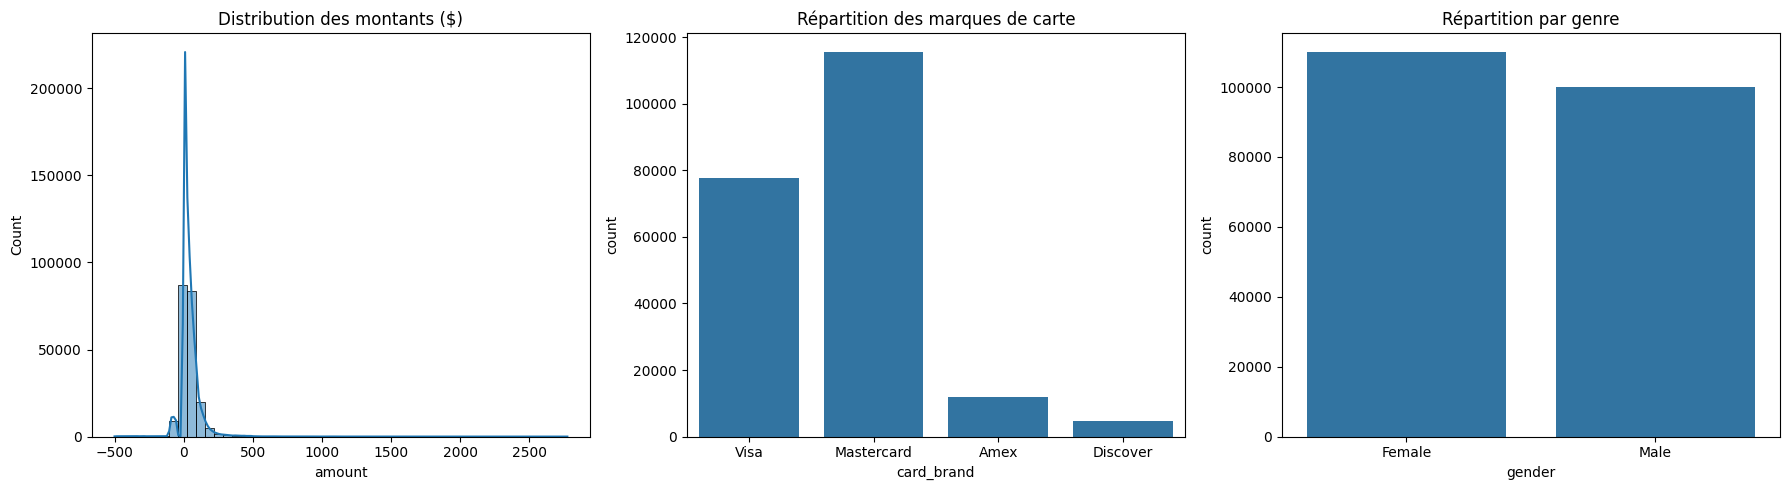

In [41]:
# --- distributions de base ---
display(Markdown("###  Répartition des principales variables"))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["amount"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution des montants ($)")

sns.countplot(x="card_brand", data=df, ax=axes[1])
axes[1].set_title("Répartition des marques de carte")

sns.countplot(x="gender", data=df, ax=axes[2])
axes[2].set_title("Répartition par genre")

plt.tight_layout()
plt.show()


### Corrélations entre variables numériques

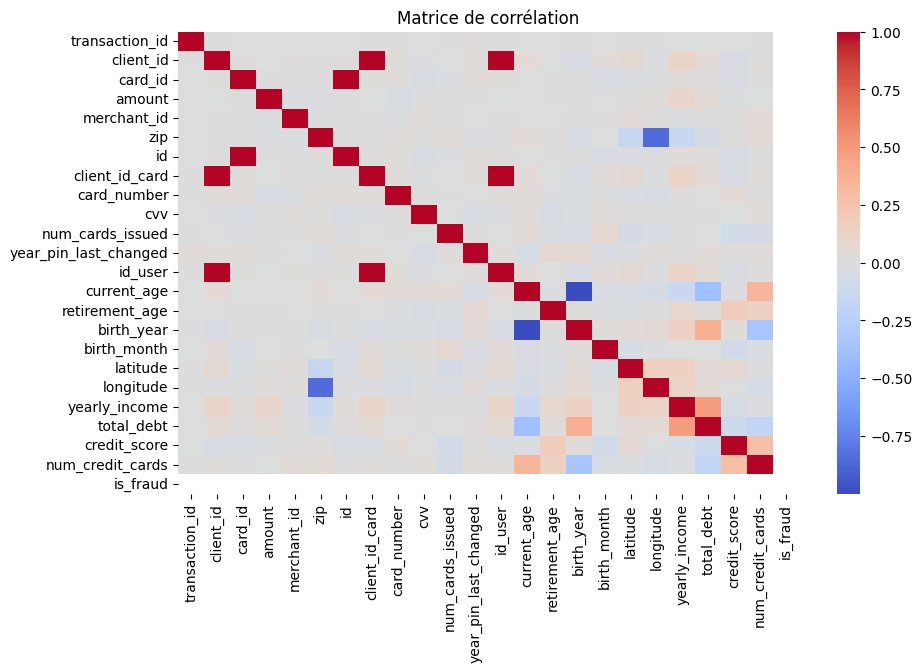

In [42]:
# --- corrélation numérique ---
display(Markdown("### Corrélations entre variables numériques"))
num_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation")
plt.show()


In [43]:
# --- résumé textuel ---
display(Markdown("###  Synthèse de l’analyse générale"))

resume_data = {
    "Aspect": [
        "Structure du dataset",
        "Qualité des données",
        "Montants des transactions",
        "Cartes et clients",
        "Variables temporelles",
        "Données géographiques",
        "Corrélations",
    ],
    "Résumé": [
        f"{df.shape[0]:,} lignes et {df.shape[1]} colonnes après fusion. Toutes les sources sont intégrées.",
        "Quelques valeurs manquantes dans les colonnes d’adresse, MCC et crédit, mais globalement propres.",
        "Montant moyen autour de 40 $, distribution asymétrique (nombreuses petites transactions).",
        "Visa est la marque la plus utilisée (~60 %). Légère majorité de clientes femmes (~52 %).",
        "Transactions entre 2016 et 2018, sans pic saisonnier majeur.",
        "Latitude et longitude disponibles → possibilité de cartographie par État.",
        "Faibles corrélations globales, mais la fraude sera à explorer selon d’autres variables explicatives."
    ]
}

resume_df = pd.DataFrame(resume_data)
display(resume_df.style.hide(axis='index').set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#2E86C1'),
                                 ('color', 'white'),
                                 ('text-align', 'center'),
                                 ('font-weight', 'bold'),
                                 ('padding', '6px') ]},
    {'selector': 'td', 'props': [('border', '1px solid #ddd'),
                                 ('padding', '8px'),
                                 ('text-align', 'left')]}]))

display(Markdown("""
###  Conclusion
Le dataset final regroupe les informations sur les transactions, les cartes et les utilisateurs, enrichi des codes MCC et des étiquettes de fraude.
Les données sont globalement cohérentes et exploitables pour des analyses plus ciblées sur les comportements de fraude et la segmentation client.
"""))

###  Synthèse de l’analyse générale

Aspect,Résumé
Structure du dataset,"210,000 lignes et 41 colonnes après fusion. Toutes les sources sont intégrées."
Qualité des données,"Quelques valeurs manquantes dans les colonnes d’adresse, MCC et crédit, mais globalement propres."
Montants des transactions,"Montant moyen autour de 40 $, distribution asymétrique (nombreuses petites transactions)."
Cartes et clients,Visa est la marque la plus utilisée (~60 %). Légère majorité de clientes femmes (~52 %).
Variables temporelles,"Transactions entre 2016 et 2018, sans pic saisonnier majeur."
Données géographiques,Latitude et longitude disponibles → possibilité de cartographie par État.
Corrélations,"Faibles corrélations globales, mais la fraude sera à explorer selon d’autres variables explicatives."



###  Conclusion
Le dataset final regroupe les informations sur les transactions, les cartes et les utilisateurs, enrichi des codes MCC et des étiquettes de fraude.  
Les données sont globalement cohérentes et exploitables pour des analyses plus ciblées sur les comportements de fraude et la segmentation client.


**Analyse ciblée sur la fraude**